In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,matthews_corrcoef, recall_score, f1_score,classification_report,precision_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# 1) Convolutional Neural Network (CNN)

In [ ]:
cd /content/drive/MyDrive/Classroom/MedicalExpert-I

/content/drive/.shortcut-targets-by-id/1sAzQhjdwLqUSIzftZj383_jjTOzeAEjI/MedicalExpert-I


In [ ]:
import tensorflow
print(tensorflow.__version__)
accuracy_scores=np.zeros(3)

2.11.0


In [ ]:
#Data Preprocessing
import cv2,os
data_path='/content/drive/MyDrive/Classroom/MedicalExpert-I'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'4Severe': 0, '0Normal': 1, '3Moderate': 2, '1Doubtful': 3, '2Mild': 4}
['4Severe', '0Normal', '3Moderate', '1Doubtful', '2Mild']
[0, 1, 2, 3, 4]


In [ ]:
#Data Preprocessing
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
#Recale and assign catagorical labels
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
from keras.utils import np_utils
new_label=np_utils.to_categorical(label)

In [ ]:
new_label.shape

(1650, 5)

CNN MODEL


In [ ]:
data.shape

(1650, 256, 256, 1)

In [ ]:
data.shape[1:]

(256, 256, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     1280      
                                                                 
 activation (Activation)     (None, 254, 254, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

Splitting data into traning and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

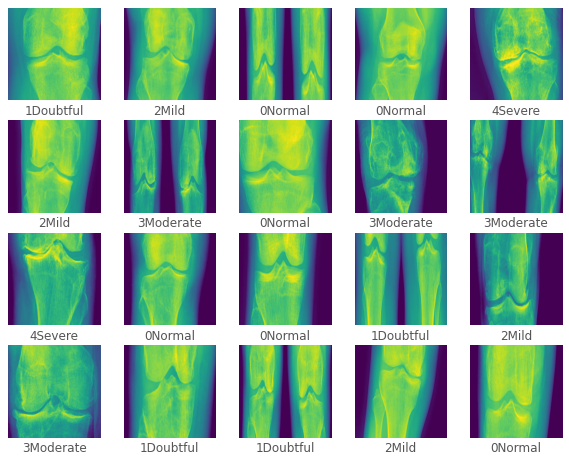

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [ ]:
history=model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
38/38 [==============================] - 22s 181ms/step - loss: 1.5721 - accuracy: 0.3258 - val_loss: 1.5145 - val_accuracy: 0.2929
Epoch 2/50
38/38 [==============================] - 5s 143ms/step - loss: 1.5133 - accuracy: 0.3266 - val_loss: 1.4791 - val_accuracy: 0.3064
Epoch 3/50
38/38 [==============================] - 5s 129ms/step - loss: 1.4805 - accuracy: 0.3308 - val_loss: 1.4704 - val_accuracy: 0.3367
Epoch 4/50
38/38 [==============================] - 5s 125ms/step - loss: 1.4478 - accuracy: 0.3662 - val_loss: 1.4379 - val_accuracy: 0.3939
Epoch 5/50
38/38 [==============================] - 5s 143ms/step - loss: 1.4235 - accuracy: 0.3855 - val_loss: 1.4463 - val_accuracy: 0.3670
Epoch 6/50
38/38 [==============================] - 5s 131ms/step - loss: 1.3842 - accuracy: 0.3889 - val_loss: 1.5498 - val_accuracy: 0.3468
Epoch 7/50
38/38 [==============================] - 5s 135ms/step - loss: 1.3860 - accuracy: 0.4024 - val_loss: 1.4648 - val_accuracy: 0.3737
Epoch

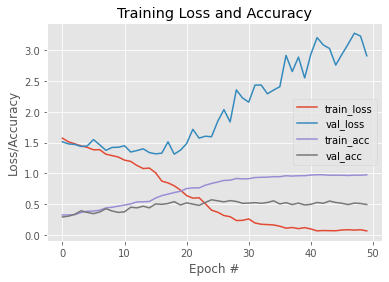

In [ ]:
# plot the training loss and accuracy
N = 50 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")

In [ ]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
train_loss, train_accuracy= model.evaluate(x_train, y_train, verbose=0)
print("test loss:", vaL_loss,)
print("test accuracy:",val_accuracy*100,"%")
print("train loss:", train_loss)
accuracy_scores[0]=train_accuracy
print("train accuracy:",accuracy_scores[1]*100,"%")


test loss: 0.9407803416252136
test accuracy: 84.84848737716675 %
train loss: 0.7341548800468445
train accuracy: 89.42760825157166 %


1/1 [==============================] - 1s 625ms/step
A.I predicts: 0Normal
Correct prediction for label 1 is 0Normal


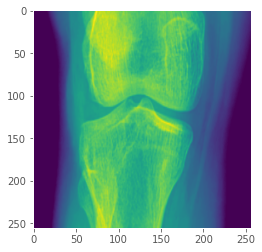

In [ ]:
X = 45

img_size = 256

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

6/6 [==============================] - 0s 43ms/step


<Figure size 432x288 with 0 Axes>

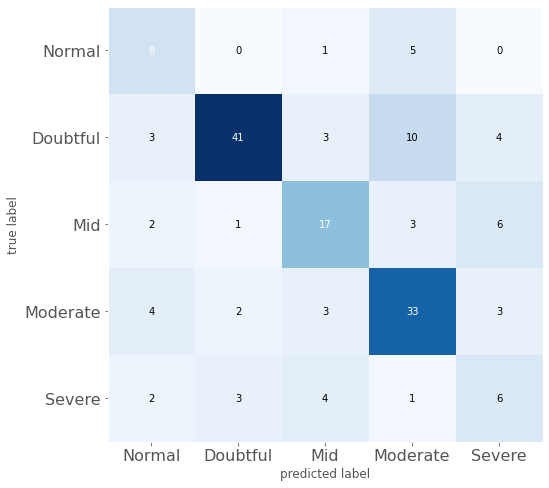

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.show()

# 2) K-Nearest Neighbor (KNN)

In [ ]:
# Define image directory
img_dir = "/content/drive/MyDrive/Classroom/MedicalExpert-I"

In [ ]:
# Define image size
img_size = (100, 100)

In [ ]:
# Define image labels
labels = ['0Normal', '1Doubtful', '2Mild', '3Moderate', '4Severe']


In [ ]:
# Extract features from images
def extract_features(img_dir, labels):
    features = []
    target = []
    for label in labels:
        folder = os.path.join(img_dir, label)
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, 0) # 0 for grayscale
            img = cv2.resize(img, img_size)
            feature = np.array(img).flatten()
            features.append(feature)
            target.append(label)
    return np.array(features), np.array(target)

In [ ]:
# Split data into training and testing sets
features, target = extract_features(img_dir, labels)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

In [ ]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Evaluate model accuracy
y_pred = knn.predict(X_test)
mcc = matthews_corrcoef(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
precision=precision_score(y_test,y_pred,average='macro')
accuracy_scores[1] = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy_scores[1] * 100))
print("Precision:",precision)
print("MCC:", mcc)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 59.39%
Precision: 0.5977413025934408
MCC: 0.4614778901335929
Recall: 0.5437721019678436
F1 Score: 0.5467832167832167


In [ ]:
# Compute the classification report of the KNN classifier
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

     0Normal       0.69      0.74      0.72        58
   1Doubtful       0.51      0.59      0.55        41
       2Mild       0.61      0.48      0.54        29
   3Moderate       0.46      0.63      0.53        19
     4Severe       0.71      0.28      0.40        18

    accuracy                           0.59       165
   macro avg       0.60      0.54      0.55       165
weighted avg       0.61      0.59      0.59       165



In [ ]:
# Define a range of k values to test
k_values = range(1, 21)

In [ ]:
# Train a KNN classifier for each k value and compute accuracy on the test set
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


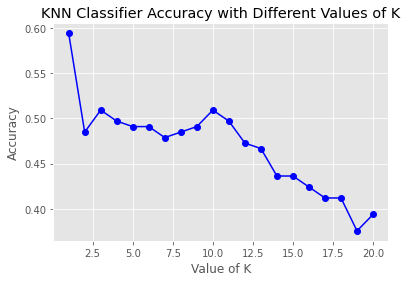

In [ ]:
# Plot the change in accuracy with values of k
plt.plot(k_values, accuracies, 'bo-')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy with Different Values of K')
plt.show()

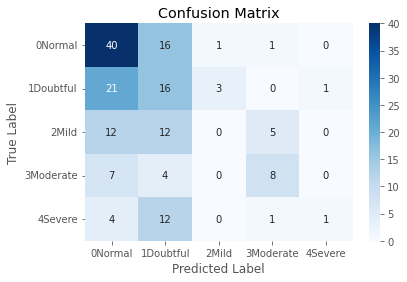

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Define image directory
img_dir = "/content/drive/MyDrive/Classroom/MedicalExpert-I"

In [ ]:
# Define image size
img_size = (100, 100)

In [ ]:
# Define image labels
labels = ['0Normal', '1Doubtful', '2Mild', '3Moderate', '4Severe']

In [ ]:
# Read images and extract features
def extract_features(img_dir):
    features = []
    target = []
    for label in labels:
        folder = os.path.join(img_dir, label)
        for file in os.listdir(folder):
            img_path = os.path.join(folder, file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, img_size)
            feature = np.array(img).flatten()
            features.append(feature)
            target.append(label)
    return np.array(features), np.array(target)


In [ ]:
# Split data into training and testing sets
features, target = extract_features(img_dir)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
# Train Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rfc.predict(X_test)

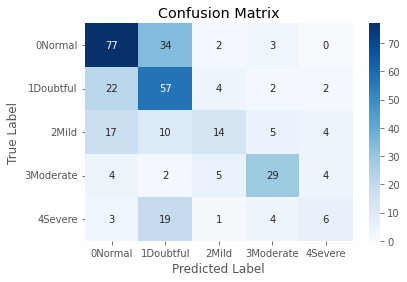

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Evaluate model accuracy,recall,precision,f1 score
y_pred = rfc.predict(X_test)
mcc = matthews_corrcoef(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
precision=precision_score(y_test,y_pred,average='macro')
accuracy_scores[2] = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy_scores[2] * 100))
print("Precision:",precision)
print("MCC:", mcc)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 55.45%
Precision: 0.5362219036058802
MCC: 0.4015336570149079
Recall: 0.48797492163009404
F1 Score: 0.4939583376743221


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     0Normal       0.63      0.66      0.64       116
   1Doubtful       0.47      0.66      0.55        87
       2Mild       0.54      0.28      0.37        50
   3Moderate       0.67      0.66      0.67        44
     4Severe       0.38      0.18      0.24        33

    accuracy                           0.55       330
   macro avg       0.54      0.49      0.49       330
weighted avg       0.55      0.55      0.54       330



(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

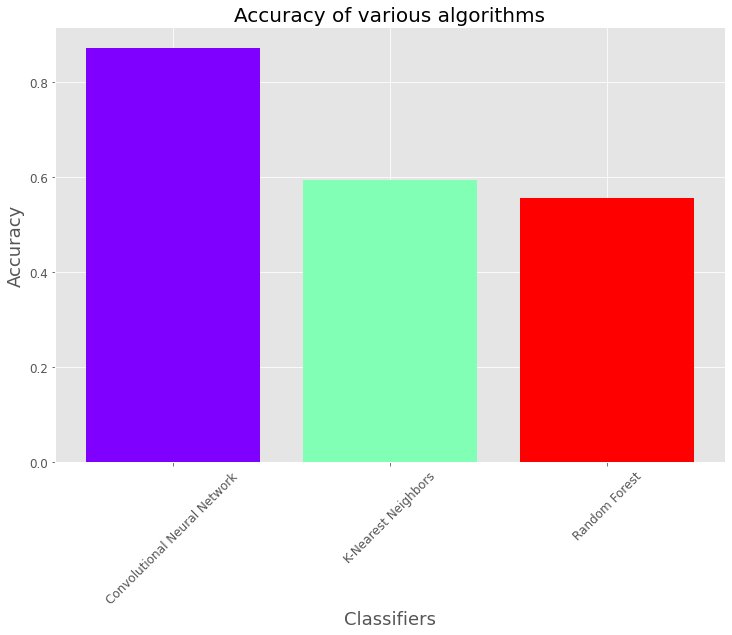

In [ ]:
#Comparison Of accuracies of all three algorithms for detecting Knee Osteoarthritis
import matplotlib.cm as cm
plt.figure(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, 3))
labels = ['Convolutional Neural Network', 'K-Nearest Neighbors', 'Random Forest']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Accuracy of various algorithms',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)